2016年度先端人工知能論Ⅰ（東京大学大学院講義）
======
Machine Learning 2 - Numpy, Scipy, Scikit-Learn
======
Kenji Ogawa, Matsuo-Lab, TMI, Univ.-Tokyo, 2016


# 今回の講座の目的

numpy, matplotlib, scikit-learn の基本的な使い方を理解する

- 既に知っているという人は宿題を進めて下さい

    宿題が終わったという人はこちらに挑戦してみて下さい

    - http://www.labri.fr/perso/nrougier/teaching/numpy.100/


- ipython notebook の使い方については以下を参照の事
    * http://cs231n.github.io/ipython-tutorial/
    * http://ipython.readthedocs.org/en/stable/


-  python については以下を参照の事
    * http://cs231n.github.io/python-numpy-tutorial/
    * https://wiki.python.org/moin/SimplePrograms
    * https://docs.python.org/2/tutorial/



# 目次

## なぜ numpy の使い方を"覚える"必要があるのか

## numpy の使い方いろいろ 

#### 行列、ベクトルの演算

* 掛け算

* スライス

* sum

* ones, zeros, reshape

* Broad cast

* numpy.newaxis

* Advanced indexing

* 条件式

#### 乱数

## Scipy, Scikit-learn
* train_test_split
* MNIST データ
* train, valid, test の使い方デモ
* 画像処理

### matplotlib.pyplot
* 普通のプロット plt.plot
* 二次元プロット　plt.imshow
* 複数のプロットの表示 plt.fig



-----
# なぜ numpy の使い方を"覚える"必要があるのか
## この授業（先端人工知能論Ⅰ）の主旨
- ### 実装を通して、Deeplearningを理解する

## 線形代数等の実装の詳細はこの授業の重要な部分ではない -> numpy にまかせる

- ### 何が使えるのかを知っておく
- ### ある問題に対して、適切な関数の組み合わせを選べるようにする

-----

## "Don't Reinvent The Wheel,

## (Unless You Plan on Learning More About Wheels)"

http://blog.codinghorror.com/dont-reinvent-the-wheel-unless-you-plan-on-learning-more-about-wheels/

-----
## 自分で実装しようとすると あまりいい事はないという例
\begin{equation}
\sum_{n=1}^N \frac{1}{n^2}
\end{equation}
を数値計算で求める方法について、

自分でpythonで実装したものと、 numpyを利用したものを比較します。

In [1]:
# Hand Made Sum Function (This is NOT Recommended in actual programing)

# naive implementation
def sum_handmade1(xs):
    sum_ = 0.0
    for x in xs:
        sum_ += x
    return sum_


# complicated implementation (explained later)
def sum_handmade2(xs):
    src = xs
    while(len(src) > 1):
        sums_neighbor = []
        for i in xrange(len(src) // 2):
            sums_neighbor.append(src[2 * i] + src[2 * i + 1])
        if len(src) % 2 == 1:
            sums_neighbor.append(src[-1])
        src = sums_neighbor
    return sums_neighbor[0]

In [3]:
from __future__ import division
import numpy as np
N = 100000000
xs = 1 / (np.arange(1, N))**2

処理速度の違いが実感できるように 一つ一つ、コマンドを流していきます

In [4]:
# use numpy sum
%time a = xs.sum()

CPU times: user 107 ms, sys: 0 ns, total: 107 ms
Wall time: 107 ms


In [5]:
# use handmade function
# it takes 10 second on mac book air
%time b = sum_handmade1(xs)

CPU times: user 12.2 s, sys: 0 ns, total: 12.2 s
Wall time: 12.2 s


In [6]:
# 40 second on mac book air
%time c = sum_handmade2(xs)

CPU times: user 30.8 s, sys: 1.16 s, total: 32 s
Wall time: 32 s


-----
... for文が遅い事が確認できたと思います。 ちなみにreduce文を使っても遅いです。**Excercise

計算結果を見てみましょう。

In [ ]:
print "xs.sum()               ", '{0:.15f}'.format(a)
print "sum_handmade1(xs)      ", '{0:.15f}'.format(b)
print "sum_handmade2(xs)      ", '{0:.15f}'.format(c)

------
```
xs.sum()                1.644934056848220
sum_handmade1(xs)       1.644934057834575   # different 
sum_handmade2(xs)       1.644934056848226
```

正確な値は　1.6449340568482264...　です **

上で最も値がずれているのは sum_handmade1(xs)です。

このずれの原因は丸め誤差にあります。
sum_handmade2という面倒な実装は丸め誤差を抑えるためです。


** https://www.wolframalpha.com/ "sum 1/n^2, n=1 to 100000000"


-----
### という事で numpyの仕様に添った書き方をしないと実用上でも
- ### 遅い
- ### 細かい事を気にしなくてはいけない

### というデメリットがある事がわかりました

## <font color='red'> numpyの書き方を理解しましょう </font> ~ ここから本題に入ります


-----
# numpyの使い方いろいろ

### numpyには様々な関数が入っています。モジュールやクラスのメンバーは dir で確認できます。

In [7]:
# list members and submodules under numpy
import numpy as np
dir(np)

['ALLOW_THREADS',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'PackageLoader',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__config__',
 '__doc__',
 '__file__',
 '__git_revision__',
 '__mkl_version__',
 '__name__',
 '__package__',
 '__path__',
 '__version__',
 '_import_tools',
 '_mat',
 'abs',
 'absolute',
 'absolute_import',
 'add',
 'add_docstring',
 'add_newdoc',
 'add_newdoc_ufunc',
 'add_newdocs',

### numpyのVersionを確認しましょう

In [8]:
np.__version__

'1.10.4'

### サブモジュールにも関数が入っています

In [9]:
dir(np.linalg)

['LinAlgError',
 'Tester',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '_umath_linalg',
 'absolute_import',
 'bench',
 'cholesky',
 'cond',
 'det',
 'division',
 'eig',
 'eigh',
 'eigvals',
 'eigvalsh',
 'info',
 'inv',
 'lapack_lite',
 'linalg',
 'lstsq',
 'matrix_power',
 'matrix_rank',
 'multi_dot',
 'norm',
 'pinv',
 'print_function',
 'qr',
 'slogdet',
 'solve',
 'svd',
 'tensorinv',
 'tensorsolve',
 'test']

In [ ]:
dir(np.random)

### 関数の詳細は?で

In [10]:
np.random.randint?

### numpy の全ての機能について説明する事は出来ないので、ここでは特に今後の演習で使うであろう基本的な事柄を説明します。

### どうなるかを予想してから実行ボタンを押して下さい。

### ここにあるコードは変更しても問題ありません、理解を深めるために自分で一部変更して実行してみて下さい

## 行列、ベクトルに関する計算

In [11]:
import numpy as np
W = np.array([[1, 2, 3], [4, 5, 6]])
x = np.array([7, 8, 9])
#W = np.array([[1,2,3,4],[4,5,6,7],[8,9,10,11]])

print W
print
print x
print
# transpose
print W.T
print
# flatten
print W.flatten()
print
# reshape
print W.reshape(3, 2)

[[1 2 3]
 [4 5 6]]

[7 8 9]

[[1 4]
 [2 5]
 [3 6]]

[1 2 3 4 5 6]

[[1 2]
 [3 4]
 [5 6]]


In [13]:
# dot product
# 1*7 + 2*8 + 3*9 = 50
# 4*7 + 5*8 + 6*9 = 122

W = np.array([[1, 2, 3], [4, 5, 6]])
x = np.array([7, 8, 9])

print "np.dot(W,x)\n", np.dot(W, x)
print "np.dot(x,W.T)\n", np.dot(x, W.T)

np.dot(W,x)
[ 50 122]
np.dot(x,W.T)
[ 50 122]


In [14]:
# scalar multiplication

W = np.array([[1, 2, 3], [4, 5, 6]])
x = np.array([7, 8, 9])

print "W * 2\n", W * 2
print
print "-W\n", -W

W * 2
[[ 2  4  6]
 [ 8 10 12]]

-W
[[-1 -2 -3]
 [-4 -5 -6]]


### 成分の取り出し、スライス
```
x[begin: end: step]

2番めのコロンは省略可

x[begin: end]
```

- begin と end　の 考え方

```
x = array([7, 8, 9, 10)]

component 7  8  9  10
index     0  1  2   3  4
          |            |
          begin        end
```

In [15]:
# components, slice
x = np.array([7, 8, 9, 10])

print "x: ", x

print "x[0]: ", x[0]
print "x[1]: ", x[1]
print "x[2]: ", x[2]
print
print "x[-1]: ", x[-1]
print "x[-2]: ", x[-2]

print "x[0:4:1]: ", x[0:4:1]
print "x[1:3]:", x[1:3]
print "x[:3]: ", x[:3]
print "x[:-1]: ", x[:-1]
print "x[1:] : ", x[1:]

print "x[::-1]: ", x[::-1]
print
print "x[::2]: ", x[::2]
print "x[1::2]: ", x[1::2]

x:  [ 7  8  9 10]
x[0]:  7
x[1]:  8
x[2]:  9

x[-1]:  10
x[-2]:  9
x[0:4:1]:  [ 7  8  9 10]
x[1:3]: [8 9]
x[:3]:  [7 8 9]
x[:-1]:  [7 8 9]
x[1:] :  [ 8  9 10]
x[::-1]:  [10  9  8  7]

x[::2]:  [7 9]
x[1::2]:  [ 8 10]


In [16]:
W = np.array([[1, 2, 3], [4, 5, 6]])

print W
print
print W[0]
print W[1]
print
print W[:, 0]
print W[:, 1]
print W[:, 2]
print
print W[::-1]
print
print W[:, ::-1]
print
print W[::-1, ::-1]

[[1 2 3]
 [4 5 6]]

[1 2 3]
[4 5 6]

[1 4]
[2 5]
[3 6]

[[4 5 6]
 [1 2 3]]

[[3 2 1]
 [6 5 4]]

[[6 5 4]
 [3 2 1]]


In [17]:
# axis, sum
W = np.array([[1, 2, 3], [4, 5, 6]])

print W
print
print W.sum()
print
print W.sum(axis=0)
print
print W.sum(axis=1)

[[1 2 3]
 [4 5 6]]

21

[5 7 9]

[ 6 15]


In [18]:
#　ones, zeros, reshape
print np.zeros(10)
print
print np.ones(10)
print
print (np.ones(10) * 0.5)
print
print np.arange(10).reshape(2, 5)
print

z = np.zeros(10)
x = np.arange(7, 10)
z[:len(x)] += x
print z

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]

[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5]

[[0 1 2 3 4]
 [5 6 7 8 9]]

[ 7.  8.  9.  0.  0.  0.  0.  0.  0.  0.]


### broad castについての説明
W.shape = (M,N), x.shape = (N,)の場合

(N,) => (M, N) とする事で xをWのshapeに合わせる

ただし (M,) => (M, N) のような broad cast は仕様上できない

http://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html

http://sucrose.hatenablog.com/entry/2014/12/15/000352

In [25]:
# broad cast

W = np.array([[1, 2, 3], [4, 5, 6]])
x = np.array([7, 8])

print W
print x
print
print x - 1
print
print W - 1
print
print (W.T * x).T
print
print (W.T + x).T
print
print W + x[:,np.newaxis]
print

[[1 2 3]
 [4 5 6]]
[7 8]

[6 7]

[[0 1 2]
 [3 4 5]]

[[ 7 14 21]
 [32 40 48]]

[[ 8  9 10]
 [12 13 14]]

[[ 8  9 10]
 [12 13 14]]



### numpy.newaxis を使った broad cast
x.shape = (3,1)
y.shape = (3,)
のとき

まず右側の数字 x.shape[-1]とy.shape[-1]を合わせる

x.shape (3,1) => (3,3)

次に足りないのはそのままコピー

y.shape (3,) => (3,3)

In [26]:
W = np.array([[1, 2, 3], [4, 5, 6]])
x = np.array([7, 8, 9])

print W.shape
print W.T.shape
print
print x.shape
print x.T.shape  # x と x.Tの shapeは同じ
print
print x[np.newaxis, :]  # 2 dimension
print
print x[np.newaxis, :].shape
print
print x[:, np.newaxis]  # 2 dimension with different shape
print
print x[:, np.newaxis].shape

print x[:, np.newaxis] * x
print
print x[np.newaxis].shape  # x[np.newaxis,:]と同じ
print
print W.T + x[np.newaxis, :].T

(2, 3)
(3, 2)

(3,)
(3,)

[[7 8 9]]

(1, 3)

[[7]
 [8]
 [9]]

(3, 1)
[[49 56 63]
 [56 64 72]
 [63 72 81]]

(1, 3)

[[ 8 11]
 [10 13]
 [12 15]]


In [27]:
# squared norm
# sqrt(7*7 + 8*8 + 9*9) = 13.928....
x = np.array([7, 8, 9])
np.linalg.norm(x, ord=2)

13.928388277184119

## 練習
* ### 1.
```
x = np.array([7,8,9])
W = np.array([[1,2,3],[4,5,6]])
```
と同様のx, Wを得るように np.arangeを使ったやり方を書いてください。


* ### 2.

    以下の様な表式を得るようにWを変形してください。 ヒント: 縦の差は3,横の差は-1
```
[[ 1.  0. -1.]
 [ 4.  3.  2.]]
```
    

In [ ]:
# write down your code

#W = np.array([[1,2,3],[4,5,6]])
#x = np.arange(7,XXX)
#W = np.arange(1,7).reshape(XXX,YYY)
# print x,W

# W[?????] - 2

## 行列の成分をリストとして取り出す

#### Advanced Indexingの部分を見てください http://docs.scipy.org/doc/numpy-1.10.0/reference/arrays.indexing.html

In [28]:
# import numpy as np
x = np.arange(1, 3)[:, np.newaxis] * np.arange(1, 5)
print 'x\n', x
print
y = x[[0, 1, 0, 1], [0, 1, 2, 3]]
print 'y\n', y

# z is equivalent as y
# [(0,0), (1,1), (0,2), (1,3)] is zip([0,1,0,1], [0,1,2,3]) 
z = np.array([x[0, 0], x[1, 1], x[0, 2], x[1, 3]])
print 'z\n', z

x
[[1 2 3 4]
 [2 4 6 8]]

y
[1 4 3 8]
z
[1 4 3 8]


## 条件式

- numpy.arrayに条件式を書くと、成分毎のTrue, Falseを返す
- numpy.arrayのかぎ括弧内に条件式を書くとTrueになっている成分だけを取り出す
- 条件式ではなく、True, Falseのnumpy.arrayを直接入れても同様

※必ずnumpy.arrayであること。listだと振る舞いは違う。

In [29]:
import numpy as np

a = np.arange(10)
print a
print a < 5
b = np.arange(50, 60)
print b
print b[a < 5]
print b[np.array([True, True, True, True, True, False, False, False, False, False])]
print b[[True, True, True, True, True, False, False, False, False, False]]

[0 1 2 3 4 5 6 7 8 9]
[ True  True  True  True  True False False False False False]
[50 51 52 53 54 55 56 57 58 59]
[50 51 52 53 54]
[50 51 52 53 54]
[51 51 51 51 51 50 50 50 50 50]


/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


-----
## 乱数
ガウス型と一様乱数

In [30]:
# This is abracadabra not to show unwanted warning message
import matplotlib as mpl
font_cache_path = mpl.get_cachedir() + '/fontList.cache'
%rm -f $font_cache_path

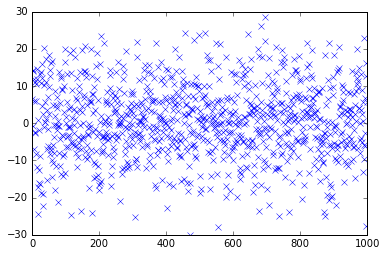

In [32]:
import numpy as np
import matplotlib.pyplot as plt
# グラフをipython notebook内に表示
%matplotlib inline

r = np.random.normal(0, 10, 1000)  # この数字を変えてみよう。
plt.plot(r, 'x')
plt.show()
# np.random.normal?

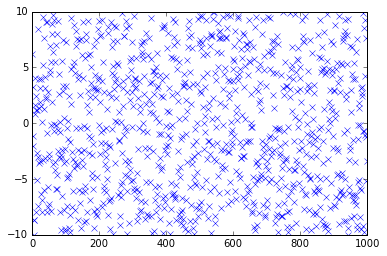

In [34]:
r = np.random.uniform(-10, 10, 1000)  # この数字を変えてみよう。
plt.plot(r, 'x')
plt.show()
# np.random.uniform?

In [ ]:
import sklearn.utils
# random.seedを設定するといつも同じ乱数が生成される
np.random.seed(12345)  # ここをコメントアウトすると？, (123) => ()にすると？
print sklearn.utils.shuffle(xrange(10))
print sklearn.utils.shuffle(xrange(10))
print sklearn.utils.shuffle(xrange(10))

In [35]:
# 応用編
# RandomStateを使った書き方, 目的別に乱数を発生させる場合に必要
import numpy as np
import sklearn

rng0 = np.random.RandomState(12345)
rng1 = np.random.RandomState(34567)
print sklearn.utils.shuffle(xrange(10), random_state=rng0)
print sklearn.utils.shuffle(xrange(10), random_state=rng1)
print sklearn.utils.shuffle(xrange(10), random_state=rng0)
print sklearn.utils.shuffle(xrange(10), random_state=rng1)
print

rng0 = np.random.RandomState(12345)
rng1 = np.random.RandomState(34567)
print sklearn.utils.shuffle(xrange(10), random_state=rng1)
print sklearn.utils.shuffle(xrange(10), random_state=rng1)
print sklearn.utils.shuffle(xrange(10), random_state=rng0)
print sklearn.utils.shuffle(xrange(10), random_state=rng0)

[0, 7, 3, 9, 6, 4, 1, 8, 5, 2]
[3, 0, 5, 1, 7, 8, 4, 9, 6, 2]
[4, 0, 9, 5, 7, 3, 8, 6, 1, 2]
[9, 7, 4, 1, 6, 5, 2, 0, 8, 3]

[3, 0, 5, 1, 7, 8, 4, 9, 6, 2]
[9, 7, 4, 1, 6, 5, 2, 0, 8, 3]
[0, 7, 3, 9, 6, 4, 1, 8, 5, 2]
[4, 0, 9, 5, 7, 3, 8, 6, 1, 2]


# Sklearn
http://scikit-learn.org/stable/

## Train Test Split

In [38]:
from sklearn.cross_validation import train_test_split
# from sklearn.model_selection import train_test_split  # for sklearn
# version'0.18.dev0'
import string

lettersAtoE = string.uppercase[:5]
print lettersAtoE
print

train0to4, test0to4, trainAtoE, testAtoE = train_test_split(xrange(5), lettersAtoE)

# ABCDEを01234と読みかえるとどうなるか
print train0to4
print trainAtoE
print
print test0to4
print testAtoE

ABCDE

[4, 0, 2]
['E', 'A', 'C']

[3, 1]
['D', 'B']


## MNIST 手書き数字データ
http://yann.lecun.com/exdb/mnist/

### データの取得

mnist.data.shape (70000, 784)
mnist.target.shape (70000,)
set(mnist.target) set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])


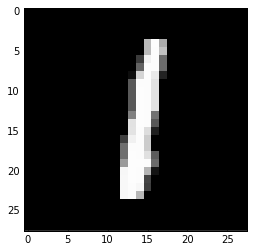

In [43]:
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
%matplotlib inline

# load data on your directry ~/scikit_learn_data/mldata/
# if data does'nt exist, it downloads the data from site.
mnist = fetch_mldata('MNIST original')

# mnist.dataにはたくさんの画像データ（手書き数字）が入っている。
print "mnist.data.shape", mnist.data.shape  # image 28 x 28 pixel
print "mnist.target.shape", mnist.target.shape  # the label 0,1,2,...,9
print "set(mnist.target)", set(mnist.target)

plt.imshow(mnist.data[7999].reshape(28, 28), cmap='gray', interpolation='none')
plt.show()

## Train, Validation, Test
### 言葉の意味
* train set 学習セット

    モデルを構築するのに使用
 

* validalidation set (development set) 検証セット

    構築中のモデルの良さを調べるのに使う。または、モデルの候補から一番いいものを選ぶために使う。


* test set 実験セット

    モデルを構築して、ベストのモデルを選んだ後、そのモデルの良さを調べるために使用する。モデル構築中にはこのセットを触ってはいけない。
    
それぞれのセットでは、教師あり学習（supervised learning）の場合、data と それに対応した label　がある。　手書き数字文字の場合は画像(data)とその画像が示す数値(label)    

## Train, Valid, Test の使い方デモ

In [44]:
# Select one of Classifeir (LinearSVC, KNeighbor, SDG) using validation set
# and test best set

import numpy as np
from sklearn.cross_validation import train_test_split
# from sklearn.model_selection import train_test_split  # for sklearn
# version'0.18.dev0'

from sklearn.datasets import fetch_mldata
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score

mnist = fetch_mldata('MNIST original')
M = len(mnist.data)
N = 2000  # Use part of MNIST data to save computation time
# randomly select N numbers from 0 to M
selected = np.random.permutation(xrange(M))[:N]

# Split data into Train, Valid, Test
train_valid_X, test_X, train_valid_y, test_y =\
    train_test_split(mnist.data[selected], mnist.target[selected])
train_X, valid_X, train_y, valid_y =\
    train_test_split(train_valid_X, train_valid_y)

classifiers = [LinearSVC(), KNeighborsClassifier(), SGDClassifier()]

# Train each classifier with Train set
accs = []
for clf_type, classifier in enumerate(classifiers):
    classifier.fit(train_X, train_y)
    pred_train = classifier.predict(train_X)
    acc_train = accuracy_score(train_y, pred_train)
    pred_valid = classifier.predict(valid_X)
    acc_valid = accuracy_score(valid_y, pred_valid)
    print "classifier type: %d, Train Accuracy: %f, Validation Accuracy %f" \
        % (clf_type, acc_train, acc_valid)
    accs.append(acc_valid)

# Chose best classifier which have highest validation accuracy
i_clf_best = np.argmax(accs)
print "Best Classifier: %d" % i_clf_best
clf_best = classifiers[i_clf_best]

# Test selected classifier
pred = clf_best.predict(test_X)
acc = accuracy_score(test_y, pred)
print "Test(Best Classifier): %f" % acc

classifier type: 0, Train Accuracy: 1.000000, Validation Accuracy 0.837333
classifier type: 1, Train Accuracy: 0.925333, Validation Accuracy 0.888000
classifier type: 2, Train Accuracy: 0.900444, Validation Accuracy 0.834667
Best Classifier: 1
Test(Best Classifier): 0.878000


### 画像処理

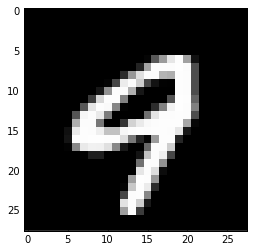

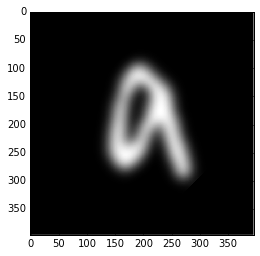

In [45]:
import scipy.ndimage

ZOOM = 10  # 変えてみよう
SIGMA = 10  # 変えてみよう
ANGLE = 45  # 変えてみよう

img = mnist.data[-1].reshape(28, 28)
plt.imshow(img, cmap='gray', interpolation='none')
plt.show()

# 縮小拡大
img = scipy.ndimage.zoom(img, (ZOOM, ZOOM), order=1)
# ぼかし
img = scipy.ndimage.gaussian_filter(img, SIGMA)
# 回転
img = scipy.ndimage.rotate(img, ANGLE)

plt.imshow(img, cmap='gray', interpolation='none')
plt.show()
# edge抽出など
# http://scikit-image.org/docs/dev/auto_examples/plot_canny.html
# http://www.tp.umu.se/~nylen/fnm/pylect/advanced/image_processing/index.html

### 4枚をプロット　pyplot.figure

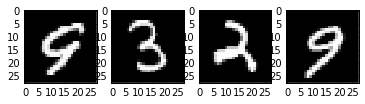

In [46]:
import sklearn
imgs = map(lambda x: x.reshape(28, 28), sklearn.utils.shuffle(mnist.data))

fig = plt.figure()
ax = fig.add_subplot(1, 4, 1)  # change (2,2,1)
ax.imshow(imgs[0], cmap='gray', interpolation='none')
ax = fig.add_subplot(1, 4, 2)  # change (2,2,2)
ax.imshow(imgs[1], cmap='gray', interpolation='none')
ax = fig.add_subplot(1, 4, 3)  # change (2,2,3)
ax.imshow(imgs[2], cmap='gray', interpolation='none')
ax = fig.add_subplot(1, 4, 4)  # change (2,2,4)
ax.imshow(imgs[3], cmap='gray', interpolation='none')
plt.show()

#### 問題

mnist.dataには画像は何枚あるでしょうか。

画像データはどのようなグレイスケールで表されているでしょうか。

４枚の数字をタテ２xヨコ２で表示してみましょう

mnistにはどの数字がどれだけ入っているでしょうか

In [ ]:
#write down your code

# matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

y = [0, 2, 1]

plt.plot(y)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# 2 curves
y1 = [0, 2, 1]
y2 = [1, 3, 4]

# zip を使った書き方
plt.plot(zip(y1, y2))
plt.show()

# plotを２回やる
plt.plot(y1)
plt.plot(y2)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [3, 4.5, 5, 6]
y = [0, 2, 1, 3]

plt.plot(x, y)
plt.show()

# scatter plot
plt.plot(x, y, 'o')
plt.show()

## 2次元画像
pyplot.imshow を使う


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Default, largest value is assigned white, smallest value is assigned to black
a = [[1.0, 0.7], [0.2, 0.0]]
plt.imshow(a, cmap='gray', interpolation='none')
plt.show()

In [ ]:
# using subplot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = [[1.0, 0.7], [0.2, 0.0]]
b = [[0.0, 0.2], [0.7, 1.0]]
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)  # タテ１　ヨコ２　１番目
ax.imshow(a, cmap='gray', interpolation='none')
ax = fig.add_subplot(1, 2, 2)  # タテ１　ヨコ２　２番目
ax.imshow(b, cmap='gray', interpolation='none')
plt.show()

詳しくは

http://matplotlib.org/users/pyplot_tutorial.html

http://matplotlib.org/1.4.1/examples/index.html

In [ ]:
# Exの答え (ちなみにreduce文を使っても遅いです。)
import operator as op
reduce(op.add, xs)

In [ ]:
# numpy 練習の解
print W[:, ::-1] - 2

In [ ]:
# sklearn mnist 問題の解
import sklearn

# データ数　70000
# 0~255までの整数
print len(mnist.data)
print mnist.data.dtype
print mnist.data.max()
print mnist.data.min()

imgs = map(lambda x: x.reshape(28, 28), sklearn.utils.shuffle(mnist.data))

# ４枚の数字をタテ２xヨコ２で表示してみましょう
fig = plt.figure()
for i in xrange(4):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(imgs[i], cmap='gray', interpolation='none')

In [ ]:
# mnistにはどの数字がどれだけ入っているでしょうか
import collections
collections.Counter(mnist.target)